In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model


Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv('./data/ordered_molecules.csv')

In [3]:
raw_data.head()

,time,molecule,px,py,pz,ax,ay,az
0,0,1,0.27497,0.22765,0.40548,1.185458,-1.527830,-4.614324
1,0,2,2.13410,1.61428,1.62211,-4.601109,-0.659241,1.090967
2,0,3,12.05408,12.60878,2.90295,4.530882,-2.598597,2.008448
3,0,4,0.85376,1.93829,4.87515,3.975239,0.917088,-2.261618
4,0,5,12.70257,0.12956,6.09076,-1.861295,-0.908830,5.337542


In [4]:
def generate_data(t):
    df = raw_data.loc[raw_data['time'] == t]
    
    px_plus = df.iloc[:,2] + 12.9168567587204
    px_origin = df.iloc[:,2]
    px_minus = df.iloc[:,2] - 12.9168567587204
    
    py_plus = df.iloc[:,3] + 12.9168567587204
    py_origin = df.iloc[:,3]
    py_minus = df.iloc[:,3] - 12.9168567587204
    
    pz_plus = df.iloc[:,4] + 12.9168567587204
    pz_origin = df.iloc[:,4]
    pz_minus = df.iloc[:,4] - 12.9168567587204
    
    #plus
    data_mod_1 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_2 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_3 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_4 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_5 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_6 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_7 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #minus
    data_mod_8 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_9 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_10 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_11 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_12 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_13 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_14 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    #plus + minus
    data_mod_15 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_16 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_17 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_18 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    data_mod_19 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_20 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #3
    data_mod_21 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_22 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_23 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_24 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_25 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_26 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_27 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    combined_df = pd.concat([data_mod_27.reset_index(drop=True), data_mod_1.reset_index(drop=True), data_mod_2.reset_index(drop=True), data_mod_3.reset_index(drop=True), 
                           data_mod_4.reset_index(drop=True), data_mod_5.reset_index(drop=True), data_mod_6.reset_index(drop=True), data_mod_7.reset_index(drop=True), 
                           data_mod_8.reset_index(drop=True), data_mod_9.reset_index(drop=True), data_mod_10.reset_index(drop=True), data_mod_11.reset_index(drop=True),
                           data_mod_12.reset_index(drop=True), data_mod_13.reset_index(drop=True), data_mod_14.reset_index(drop=True), data_mod_15.reset_index(drop=True),
                           data_mod_16.reset_index(drop=True), data_mod_17.reset_index(drop=True), data_mod_18.reset_index(drop=True), data_mod_19.reset_index(drop=True),
                           data_mod_20.reset_index(drop=True), data_mod_21.reset_index(drop=True), data_mod_22.reset_index(drop=True), data_mod_23.reset_index(drop=True),
                           data_mod_24.reset_index(drop=True), data_mod_25.reset_index(drop=True), data_mod_26.reset_index(drop=True)], axis = 0, ignore_index = True)
    
    
    df_acc = pd.concat([df.iloc[:,5:].reset_index(drop=True), df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True)], axis = 0, ignore_index = True)
    
    mol_num = range(1,combined_df.shape[0]+1)
    combined_df['molecule'] = mol_num
    
    result_df = pd.concat([df_acc.reset_index(drop=True), combined_df.reset_index(drop=True)], axis = 1, ignore_index = True)
    result_df.columns = ["ax", "ay", "az", "px", "py", "pz", "molecule"]
    
    result_df = result_df[["molecule", "px", "py", "pz", "ax", "ay", "az"]]
    return(result_df)

In [5]:
generate_data(0).head()

,molecule,px,py,pz,ax,ay,az
0,1,0.27497,0.22765,0.40548,1.185458,-1.527830,-4.614324
1,2,2.13410,1.61428,1.62211,-4.601109,-0.659241,1.090967
2,3,12.05408,12.60878,2.90295,4.530882,-2.598597,2.008448
3,4,0.85376,1.93829,4.87515,3.975239,0.917088,-2.261618
4,5,12.70257,0.12956,6.09076,-1.861295,-0.908830,5.337542


In [6]:
def find_neighbors(t):
    df_gen = generate_data(t)
    
    k = 9
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(df_gen)
    distances, indices = nbrs.kneighbors(df_gen)
    
    return(k, df_gen, indices[:128], distances[:128])

In [8]:
def make_df(t):
    t_df = raw_data.loc[raw_data['time']==t]
    t_plus_1_df = raw_data.loc[raw_data['time']==t+1]
    
    acc_t_plus_1 = t_plus_1_df.iloc[:,5:]
    delta_position = pd.DataFrame(np.array(t_plus_1_df.iloc[:,2:5]) - np.array(t_df.iloc[:,2:5]), columns=['dlt_px','dlt_py','dlt_pz'])
    
    k, df_gen, indices, dist = find_neighbors(t)
    
    li = []
    for i in range(0,indices.shape[0]):
        rows = []
        for j in range(1,k):
            row = df_gen.loc[df_gen['molecule'] == (indices[i][j]+1)]
            row_rp = row.iloc[:,1:4] - t_df.iloc[i,2:5]
            row_acc = pd.DataFrame(np.array(row.iloc[:,4:]) / dist[i][j])
            
            row_combined = np.array(pd.concat([row_rp.reset_index(drop=True), row_acc.reset_index(drop=True)], axis = 1))
            rows.append(row_combined)
        
        li.append(np.array(rows).ravel())
    
    acc_df = t_df[['time','ax','ay','az']]
    neighbors_df = pd.DataFrame(li)
    acc_t_plus_1.columns = ['next_ax','next_ay','next_az']
    
    df_made = pd.concat([acc_df.reset_index(drop=True), neighbors_df.reset_index(drop=True), 
                         delta_position.reset_index(drop=True), acc_t_plus_1.reset_index(drop=True)], axis = 1)
    
    return(df_made)

In [9]:
make_df(0)

,time,ax,ay,az,0,1,2,3,4,5,...,26,27,28,29,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
0,0,1.185458,-1.527830,-4.614324,0.57879,1.71064,4.46967,0.553748,0.127750,-0.315042,...,4.55315,0.037120,0.034154,0.010698,0.00250,-0.00074,-0.00356,1.173813,-1.541970,-4.631340
1,0,-4.601109,-0.659241,1.090967,-1.85913,-1.38663,-1.21663,0.137207,-0.176834,-0.534069,...,3.33652,0.041866,0.038521,0.012065,-0.00043,0.00778,-0.00325,-4.672077,-0.805457,1.064703
2,0,4.530882,-2.598597,2.008448,0.50787,-9.17274,-0.69184,-0.036087,-0.123122,0.333341,...,1.97220,0.239673,0.055293,-0.136356,0.00248,0.00010,-0.00881,4.432026,-2.609304,2.213726
3,0,3.975239,0.917088,-2.261618,0.21018,-0.54241,3.17657,0.669420,0.677787,-0.467350,...,-3.25304,-0.452035,-0.064767,0.107182,0.00475,0.00255,0.00387,3.846336,0.828634,-2.289510
4,0,-1.861295,-0.908830,5.337542,-0.14062,3.30648,-3.87965,-0.060144,-0.205205,0.555571,...,5.21651,-0.214714,-0.033651,0.017779,-0.00041,-0.00127,0.00487,-1.790789,-0.845025,5.255177
5,0,2.984083,3.021378,-2.083314,-0.21018,0.54241,-3.17657,0.891767,0.205731,-0.507349,...,0.09427,-0.110402,0.087065,-0.258069,0.00510,0.00051,0.00569,2.837450,3.041534,-2.144288
6,0,-2.773368,1.320404,0.073289,0.05979,-9.40348,3.34043,-0.058486,0.067185,-0.032159,...,3.12372,-0.114337,0.188271,0.011100,-0.00301,-0.00246,0.00213,-2.733294,1.435877,-0.048323
7,0,-2.901205,-0.454694,0.240227,-1.70307,1.35201,1.44919,-0.158887,0.182519,-0.087365,...,0.08574,0.024212,0.033366,0.006048,0.00752,-0.00149,0.00148,-3.003942,-0.412420,0.234313
8,0,-0.610102,0.700844,-0.335467,1.70307,-1.35201,-1.44919,-0.755554,-0.118415,0.062562,...,-7.79783,0.059070,0.054350,0.017024,0.00082,-0.00226,0.00415,-0.605283,0.667040,-0.499314
9,0,6.847360,-3.161887,-5.186860,-0.48880,-3.21337,2.96885,0.421794,0.097308,-0.239970,...,-1.50082,0.098894,-0.127455,-0.384937,-0.00149,-0.00322,-0.00430,6.803965,-3.093445,-5.090460


In [10]:
#make whole dataset
final_data = make_df(0)

for t in range(1,1999):
    df_part = make_df(t)
    final_data = pd.concat([final_data.reset_index(drop=True), df_part.reset_index(drop=True)], axis = 0, ignore_index=True)

In [11]:
final_data.head()

,time,ax,ay,az,0,1,2,3,4,5,...,26,27,28,29,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
0,0,1.185458,-1.527830,-4.614324,0.57879,1.71064,4.46967,0.553748,0.127750,-0.315042,...,4.55315,0.037120,0.034154,0.010698,0.00250,-0.00074,-0.00356,1.173813,-1.541970,-4.631340
1,0,-4.601109,-0.659241,1.090967,-1.85913,-1.38663,-1.21663,0.137207,-0.176834,-0.534069,...,3.33652,0.041866,0.038521,0.012065,-0.00043,0.00778,-0.00325,-4.672077,-0.805457,1.064703
2,0,4.530882,-2.598597,2.008448,0.50787,-9.17274,-0.69184,-0.036087,-0.123122,0.333341,...,1.97220,0.239673,0.055293,-0.136356,0.00248,0.00010,-0.00881,4.432026,-2.609304,2.213726
3,0,3.975239,0.917088,-2.261618,0.21018,-0.54241,3.17657,0.669420,0.677787,-0.467350,...,-3.25304,-0.452035,-0.064767,0.107182,0.00475,0.00255,0.00387,3.846336,0.828634,-2.289510
4,0,-1.861295,-0.908830,5.337542,-0.14062,3.30648,-3.87965,-0.060144,-0.205205,0.555571,...,5.21651,-0.214714,-0.033651,0.017779,-0.00041,-0.00127,0.00487,-1.790789,-0.845025,5.255177


In [12]:
final_data.shape

(255872, 40)

In [13]:
##########################################################
################# save dataframe #########################
final_data.to_csv('./data/KNN_5_newPosition.csv', index = False)

In [37]:
#final_data = pd.read_csv('./data/KNN_5_newPosition.csv')

In [17]:
final_data.shape

(255545, 39)

In [14]:
exc_x_idx, = np.where(abs(final_data['dlt_px']) > 12)
exc_y_idx, = np.where(abs(final_data['dlt_py']) > 12)
exc_z_idx, = np.where(abs(final_data['dlt_pz']) > 12)

exc_idx = set(exc_x_idx) | set(exc_y_idx) | set(exc_z_idx)
final_data = final_data.loc[final_data.index.drop(list(exc_idx))]

In [16]:
final_data.shape

(255545, 40)

In [23]:
x_train = final_data.loc[(final_data['time'] >= 0) & (final_data['time'] <= 1399)].iloc[:,1:34]
y_train = final_data.loc[(final_data['time'] >= 0) & (final_data['time'] <= 1399)].iloc[:,34:]

x_test = final_data.loc[(final_data['time'] >= 1400) & (final_data['time'] <= 1998)].iloc[:,1:34]
y_test = final_data.loc[(final_data['time'] >= 1400) & (final_data['time'] <= 1998)].iloc[:,34:]

In [25]:
y_train.head()

,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
0,0.00250,-0.00074,-0.00356,1.173813,-1.541970,-4.631340
1,-0.00043,0.00778,-0.00325,-4.672077,-0.805457,1.064703
2,0.00248,0.00010,-0.00881,4.432026,-2.609304,2.213726
3,0.00475,0.00255,0.00387,3.846336,0.828634,-2.289510
4,-0.00041,-0.00127,0.00487,-1.790789,-0.845025,5.255177


In [26]:
#model 1
model_1 = Sequential()

model_1.add(Dense(32, input_dim=33, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(6, activation='linear', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.01)))

In [27]:
model_1.compile(loss='mean_squared_error', optimizer= 'rmsprop', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_5_newPosition.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]

In [28]:
hist_1 = model_1.fit(x_train.values, y_train.values, epochs=150, batch_size=64, validation_data=(x_test, y_test), callbacks = callback_list)

Train on 178964 samples, validate on 76581 samples
Epoch 1/150
178964/178964 [==============================] - 10s 57us/step - loss: 0.4746 - mean_absolute_error: 0.2798 - val_loss: 0.2021 - val_mean_absolute_error: 0.1610

Epoch 00001: val_loss improved from inf to 0.20209, saving model to ./model/KNN_5_newPosition.h5
Epoch 2/150
178964/178964 [==============================] - 9s 49us/step - loss: 0.2405 - mean_absolute_error: 0.2052 - val_loss: 0.1616 - val_mean_absolute_error: 0.1304

Epoch 00002: val_loss improved from 0.20209 to 0.16157, saving model to ./model/KNN_5_newPosition.h5
Epoch 3/150
178964/178964 [==============================] - 9s 48us/step - loss: 0.2224 - mean_absolute_error: 0.1944 - val_loss: 0.1664 - val_mean_absolute_error: 0.1414

Epoch 00003: val_loss did not improve from 0.16157
Epoch 4/150
178964/178964 [==============================] - 9s 48us/step - loss: 0.2117 - mean_absolute_error: 0.1880 - val_loss: 0.1209 - val_mean_absolute_error: 0.0985

Epoch 0

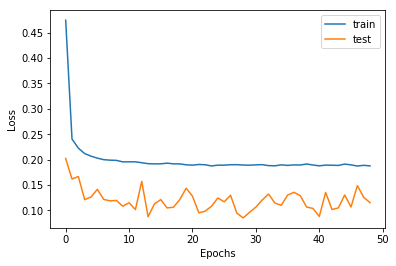

In [29]:
# plot history
plt.plot(hist_1.history['loss'], label='train')
plt.plot(hist_1.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
model = load_model('./model/KNN_5_newPosition.h5')

In [57]:
test_data = make_df(1400)

for t in range(1401,1999):
    df_part = make_df(t)
    test_data = pd.concat([test_data.reset_index(drop=True), df_part.reset_index(drop=True)], axis = 0, ignore_index=True)

In [58]:
test_data.tail()

,time,ax,ay,az,0,1,2,3,4,5,...,26,27,28,29,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
76667,1998,-1.117306,3.729599,-1.309010,-1.11728,1.23271,1.93306,0.237879,-0.160086,-0.135830,...,0.60192,0.384473,-0.409129,-0.238326,-0.00663,0.00362,0.00284,-1.025038,3.645025,-1.280867
76668,1998,3.562240,-3.790684,-2.208148,-2.78356,2.79630,1.33114,0.277607,-0.186822,-0.158515,...,-0.48296,-0.046829,-0.071886,-0.135703,-0.00373,0.00233,0.00617,3.634594,-3.766582,-2.338953
76669,1998,1.966739,5.790018,5.545910,4.58574,-3.60994,2.02446,-0.110142,0.367657,-0.129040,...,-0.23958,0.267213,0.126952,0.746413,-0.00019,0.00367,0.00267,2.307742,5.650190,5.404642
76670,1998,1.619934,-1.090169,-0.924991,2.50430,0.75071,1.88872,-0.141009,-0.452479,0.009933,...,-0.09224,0.242090,0.260319,0.064233,0.00141,0.00900,-0.00708,1.395564,-1.232665,-0.779073
76671,1998,-0.597181,-1.916267,0.042068,-2.50430,-0.75071,-1.88872,0.382507,-0.257416,-0.218414,...,-3.82178,-0.133130,0.444392,-0.155972,0.00688,0.00675,0.01085,-0.730089,-1.992210,-0.056095


In [51]:
'''
exc_x_idx_test, = np.where(abs(test_data['dlt_px']) > 12)
exc_y_idx_test, = np.where(abs(test_data['dlt_py']) > 12)
exc_z_idx_test, = np.where(abs(test_data['dlt_pz']) > 12)

exc_idx_test = set(exc_x_idx_test) | set(exc_y_idx_test) | set(exc_z_idx_test)
test_data = test_data.loc[test_data.index.drop(list(exc_idx_test))]
'''

In [59]:
test_data.shape

(76672, 40)

In [61]:
y_pred = pd.DataFrame(model.predict(test_data.iloc[:,1:34]))

In [65]:
y_pred.shape

(76672, 6)

In [72]:
now_data = raw_data.loc[(raw_data['time'] >= 1400) & (raw_data['time'] <= 1998)]
next_data = raw_data.loc[(raw_data['time'] >= 1401) & (raw_data['time'] <= 1999)].reset_index(drop=True)

In [76]:
next_position.head()

,0,1,2
0,1.408090,11.714789,12.694995
1,4.156265,3.612129,2.634904
2,2.148236,1.737027,4.035940
3,3.245074,2.497829,7.547816
4,0.364610,11.147436,7.747130


In [81]:
next_position = pd.DataFrame(np.array(now_data[['px','py','pz']]) + np.array(y_pred.iloc[:,0:3]))
predicted_df = pd.concat([next_position.reset_index(drop=True), y_pred.iloc[:,3:].reset_index(drop=True)], axis = 1)

In [82]:
predicted_df.head()

,0,1,2,3,4,5
0,1.408090,11.714789,12.694995,-1.696215,1.219759,1.482473
1,4.156265,3.612129,2.634904,-4.595814,-0.479311,-0.809145
2,2.148236,1.737027,4.035940,-2.721823,-1.331890,-0.489865
3,3.245074,2.497829,7.547816,0.205161,0.613866,-2.693146
4,0.364610,11.147436,7.747130,1.022312,-2.243188,-1.756002


In [88]:
next_data.head()

,time,molecule,px,py,pz,ax,ay,az
0,1401,1,1.40466,11.71719,12.70783,-1.842484,1.326375,1.565485
1,1401,2,4.16046,3.62368,2.64958,-4.401646,-0.661288,-0.631249
2,1401,3,2.13413,1.73831,4.04512,-2.246075,-1.475412,-0.263035
3,1401,4,3.25609,2.48157,7.54840,0.299602,0.669824,-2.733883
4,1401,5,0.36735,11.13989,7.74097,1.311092,-2.278672,-1.748925


In [89]:
px_idx, = np.where(abs(predicted_df.iloc[:,0] - next_data.iloc[:,2]) > 12)
py_idx, = np.where(abs(predicted_df.iloc[:,1] - next_data.iloc[:,3]) > 12)
pz_idx, = np.where(abs(predicted_df.iloc[:,2] - next_data.iloc[:,4]) > 12)

In [90]:
exc_idx_test = set(px_idx) | set(py_idx) | set(pz_idx)

next_data = next_data.loc[next_data.index.drop(list(exc_idx_test))]
predicted_df = predicted_df.loc[predicted_df.index.drop(list(exc_idx_test))]


In [91]:
print(mean_squared_error(next_data.iloc[:,2:], predicted_df))
print(mean_absolute_error(next_data.iloc[:,2:], predicted_df))
print(r2_score(next_data.iloc[:,2:], predicted_df))

0.01608751596010637
0.07383140443239423
0.9978897404050008


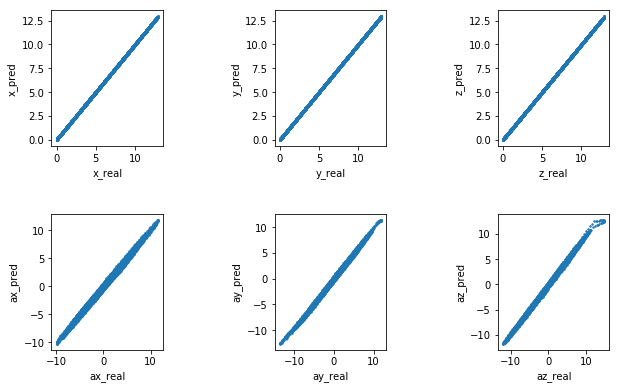

In [92]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(next_data.iloc[:,2], predicted_df.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(next_data.iloc[:,3], predicted_df.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(next_data.iloc[:,4], predicted_df.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(next_data.iloc[:,5], predicted_df.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(next_data.iloc[:,6], predicted_df.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(next_data.iloc[:,7], predicted_df.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_metric = mean_absolute_error(y_test, y_pred)
r2_error = r2_score(y_test.values, y_pred)

In [23]:
print("MSE:", mse)
print("RMSE: ", rmse)
print("MAE: ", mae_metric)
print("R2_Score:", r2_error)

MSE: 0.014651309761050437
RMSE:  0.12104259482120514
MAE:  0.07166567451383057
R2_Score: -6.904264281063376


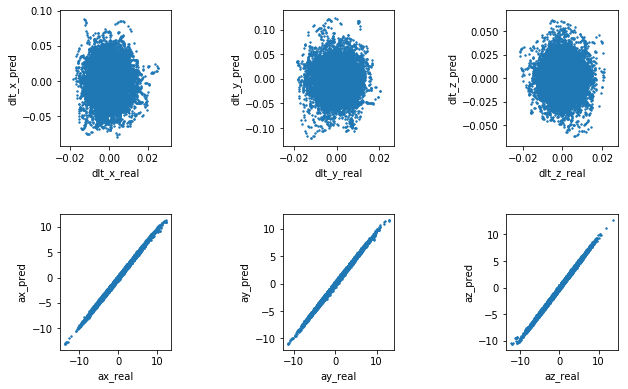

In [24]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test.values[:,0], y_pred.iloc[:,0], s= 2)
ax1.set_xlabel('dlt_x_real')
ax1.set_ylabel('dlt_x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(y_test.values[:,1], y_pred.iloc[:,1], s= 2)
ax2.set_xlabel('dlt_y_real')
ax2.set_ylabel('dlt_y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(y_test.values[:,2], y_pred.iloc[:,2], s= 2)
ax3.set_xlabel('dlt_z_real')
ax3.set_ylabel('dlt_z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(y_test.values[:,3], y_pred.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(y_test.values[:,4], y_pred.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(y_test.values[:,5], y_pred.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [25]:
#cross validation

kfold = KFold(n_splits=20, shuffle=True, random_state = 500)
data = final_data
X = final_data.iloc[:,0:33]
Y = final_data.iloc[:,33:]

cv_rmse = []
cv_mae = []
cv_r2 = []

for train, test in kfold.split(X, Y):
    
    # evaluate the model
    pred = model.predict(X.iloc[test,:])
    
    rmse = np.sqrt(mean_squared_error(Y.iloc[test,:], pred))
    mae = mean_absolute_error(Y.iloc[test,:], pred)
    r2 = r2_score(Y.iloc[test,:], pred)
    
    cv_rmse.append(rmse)
    cv_mae.append(mae)
    cv_r2.append(r2)

In [26]:
print(np.mean(cv_rmse))
print(np.std(cv_rmse))
print('\n')

print(np.mean(cv_mae))
print(np.std(cv_mae))
print('\n')

print(np.mean(cv_r2))
print(np.std(cv_r2))

0.12093260065659531
0.0014674723170908007


0.07158033112875385
0.000645927159548468


-6.828781326281922
0.18931064466023864


In [29]:
test_data = make_df(501)

for t in range(502,601):
    df_part = make_df(t)
    test_data = pd.concat([test_data.reset_index(drop=True), df_part.reset_index(drop=True)], axis = 0, ignore_index=True)

In [30]:
test_data.head()

,ax,ay,az,0,1,2,3,4,5,6,...,26,27,28,29,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
0,0.696679,-1.685899,3.330733,-0.62565,1.86537,-7.72172,-0.730071,-0.108348,-1.569026,0.24632,...,-3.94180,0.574373,-5.050313,-6.268711,-0.01264,-0.00421,-0.00418,0.746890,-1.673696,3.326261
1,3.432097,1.136779,5.471035,1.25263,-0.55542,4.39227,3.567397,-3.225998,0.222102,1.85737,...,10.34016,2.622915,-4.070094,4.831604,-0.00361,-0.00569,0.00531,3.425160,1.210228,5.401096
2,-0.730071,-0.108348,-1.569026,0.62565,-1.86537,7.72172,0.696679,-1.685899,3.330733,1.88290,...,3.77992,0.574373,-5.050313,-6.268711,0.00600,-0.00730,-0.00036,-0.762756,-0.092841,-1.605076
3,0.574373,-5.050313,-6.268711,-1.83987,-1.22490,1.31859,-0.852517,1.139151,-2.610071,-2.04852,...,-6.69223,-1.167079,-2.528626,0.592062,-0.00428,-0.00322,0.00073,0.697894,-4.953509,-6.239905
4,3.567397,-3.225998,0.222102,0.20865,0.35462,3.14999,-0.852517,1.139151,-2.610071,2.04852,...,-4.39227,3.432097,1.136779,5.471035,0.00317,-0.00652,-0.00500,3.444820,-3.093542,0.380620


In [71]:
np.max(test_data['dlt_px'])

12.911719999999999

In [72]:
exc_x_idx_test, = np.where(abs(test_data['dlt_px']) > 12)
exc_y_idx_test, = np.where(abs(test_data['dlt_py']) > 12)
exc_z_idx_test, = np.where(abs(test_data['dlt_pz']) > 12)

exc_idx = set(exc_x_idx_test) | set(exc_y_idx_test) | set(exc_z_idx_test)
test_data = test_data.loc[final_data.index.drop(list(exc_idx))]

/usr/local/anaconda/envs/env_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [75]:
np.max(test_data['dlt_pz'])

0.017839999999999634

In [31]:
x_test_data = test_data.iloc[:,0:33]

predicted = model.predict(x_test_data)

In [59]:
now_data = raw_data.loc[(raw_data['time'] >= 501) & (raw_data['time'] <= 600)]

next_data = raw_data.loc[(raw_data['time'] >= 502) & (raw_data['time'] <= 601)]

In [64]:
next_position = pd.DataFrame(np.array(now_data[['px','py','pz']]) + predicted[:,0:3])
predicted_df = pd.concat([next_position.reset_index(drop=True), pd.DataFrame(predicted[:,3:]).reset_index(drop=True)], axis = 1)

In [76]:
print(mean_squared_error(next_data.iloc[:,2:], predicted_df))
print(mean_absolute_error(next_data.iloc[:,2:], predicted_df))
print(r2_score(next_data.iloc[:,2:], predicted_df))

0.04821450065877953
0.07577099309975732
0.9955427236741013


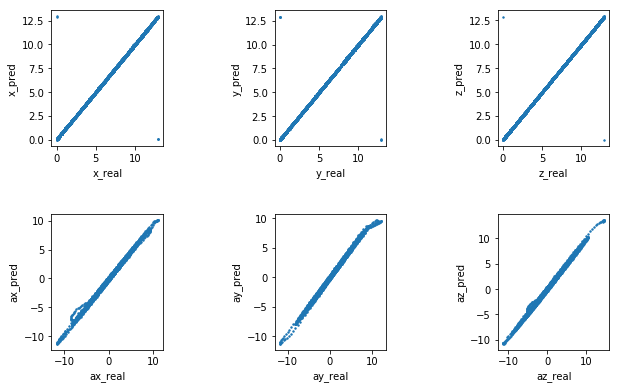

In [70]:
fig_2 = plt.figure(figsize=(10,10))

ax1 = fig_2.add_subplot(3,3,1)
ax2 = fig_2.add_subplot(3,3,2)
ax3 = fig_2.add_subplot(3,3,3)
ax4 = fig_2.add_subplot(3,3,4)
ax5 = fig_2.add_subplot(3,3,5)
ax6 = fig_2.add_subplot(3,3,6)

ax1.scatter(next_data.iloc[:,2], predicted_df.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(next_data.iloc[:,3], predicted_df.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(next_data.iloc[:,4], predicted_df.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(next_data.iloc[:,5], predicted_df.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(next_data.iloc[:,6], predicted_df.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(next_data.iloc[:,7], predicted_df.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()